In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

In [4]:
train_data  = pd.read_excel("../Pearl Challenge data with dictionary_For_Share_v4.xlsx", sheet_name='TrainData')
test_data  = pd.read_excel("../Pearl Challenge data with dictionary_For_Share_v4.xlsx", sheet_name='TestData')

print(train_data.shape)
print(test_data.shape)

(53306, 105)
(10000, 104)


In [5]:
train_data.columns

Index(['FarmerID', 'State', 'REGION', 'SEX', 'CITY', 'Zipcode', 'DISTRICT',
       'VILLAGE', 'MARITAL_STATUS', 'Location',
       ...
       'Rabi Seasons Agro Ecological Sub Zone in 2020',
       'Rabi Seasons Seasonal average groundwater thickness (cm) in 2020',
       'Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020',
       ' Night light index',
       ' Village score based on socio-economic parameters (Non normalised)',
       ' Village score based on socio-economic parameters (0 to 100)',
       ' Village category based on socio-economic parameters (Good, Average, Poor)',
       ' Land Holding Index source (Total Agri Area/ no of people)',
       ' Road density (Km/ SqKm)', 'Target_Variable/Total Income'],
      dtype='object', length=105)

In [6]:
train_data[['Target_Variable/Total Income']].describe()

,Target_Variable/Total Income
count,5.330600e+04
mean,1.376126e+06
std,2.647189e+07
min,0.000000e+00
25%,7.150000e+05
50%,9.500000e+05
75%,1.295250e+06
max,6.000000e+09


In [7]:
train_data['income_bin'] = pd.qcut(train_data['Target_Variable/Total Income'], q=10, labels=False, duplicates='drop')

In [8]:
train_data.groupby('income_bin')['Target_Variable/Total Income'].aggregate(['min','max','mean', 'std', 'count']).reset_index().sort_values(by='income_bin')

,income_bin,min,max,mean,std,count
0,0,0,600000,5.344229e+05,7.465739e+04,6703
1,1,600001,700000,6.722292e+05,2.955947e+04,6283
2,2,700002,765000,7.384385e+05,1.713975e+04,3016
3,3,765200,840000,8.007787e+05,1.355691e+04,5443
4,4,840500,950000,8.971956e+05,3.336400e+04,5992
5,5,950001,1030660,9.961425e+05,1.594062e+04,4547
6,6,1031000,1200000,1.136231e+06,5.540602e+04,6397
7,7,1201000,1400000,1.316440e+06,5.960792e+04,4481
8,8,1400001,1800000,1.588797e+06,1.142420e+05,5684
9,9,1802000,6000000000,5.642966e+06,8.847625e+07,4760


In [9]:
train_data['income_bin'].value_counts()

income_bin
0    6703
6    6397
1    6283
4    5992
8    5684
3    5443
9    4760
5    4547
7    4481
2    3016
Name: count, dtype: int64

<Axes: title={'center': 'Income Bin Distribution'}, xlabel='income_bin'>

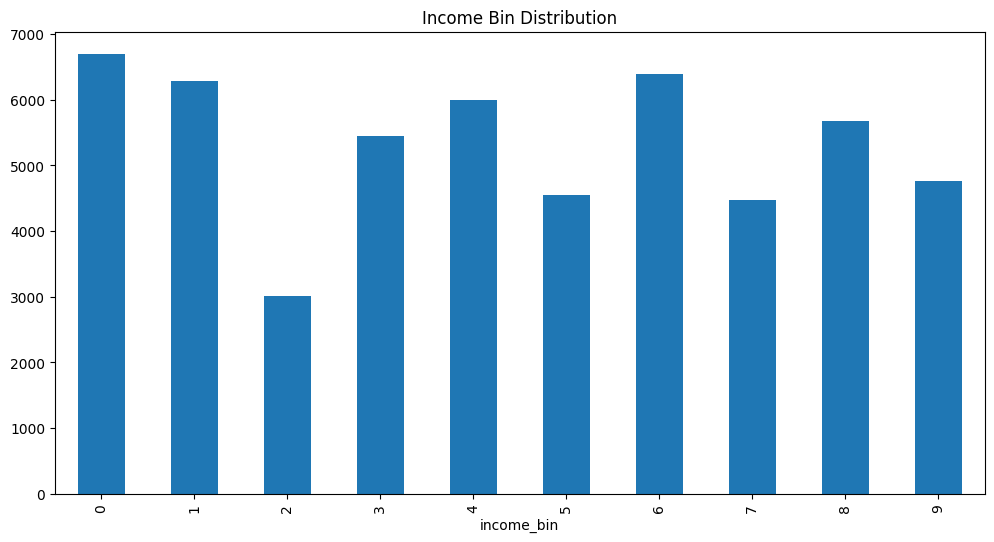

In [10]:
train_data['income_bin'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), title='Income Bin Distribution')

<Axes: title={'center': 'State Distribution'}, xlabel='State'>

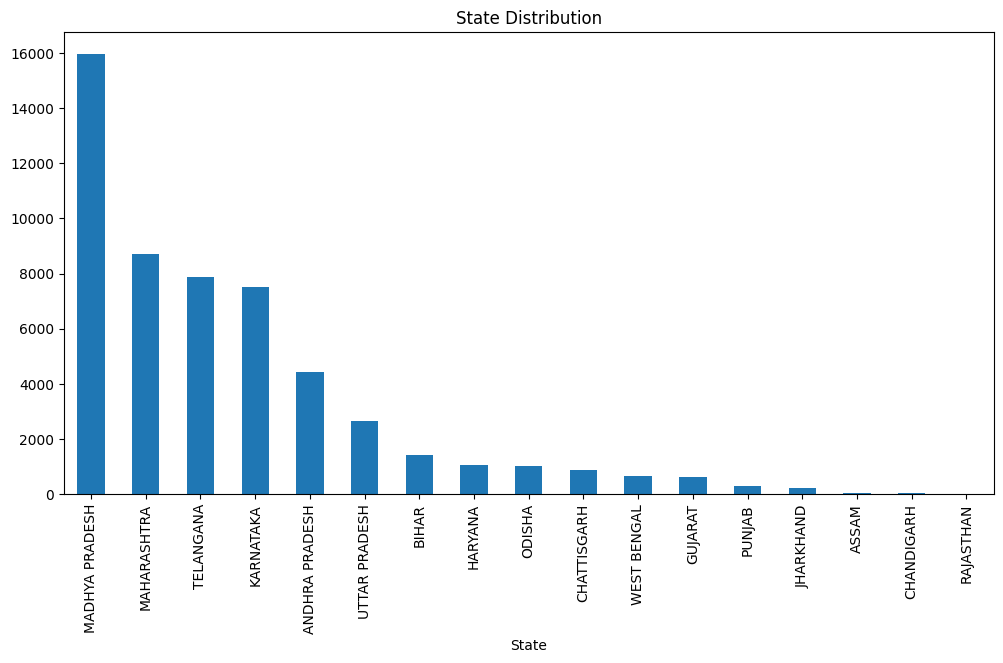

In [11]:
train_data['State'].value_counts().plot(kind='bar', figsize=(12, 6), title='State Distribution')

<Axes: title={'center': 'Top30 City Distribution'}, xlabel='CITY'>

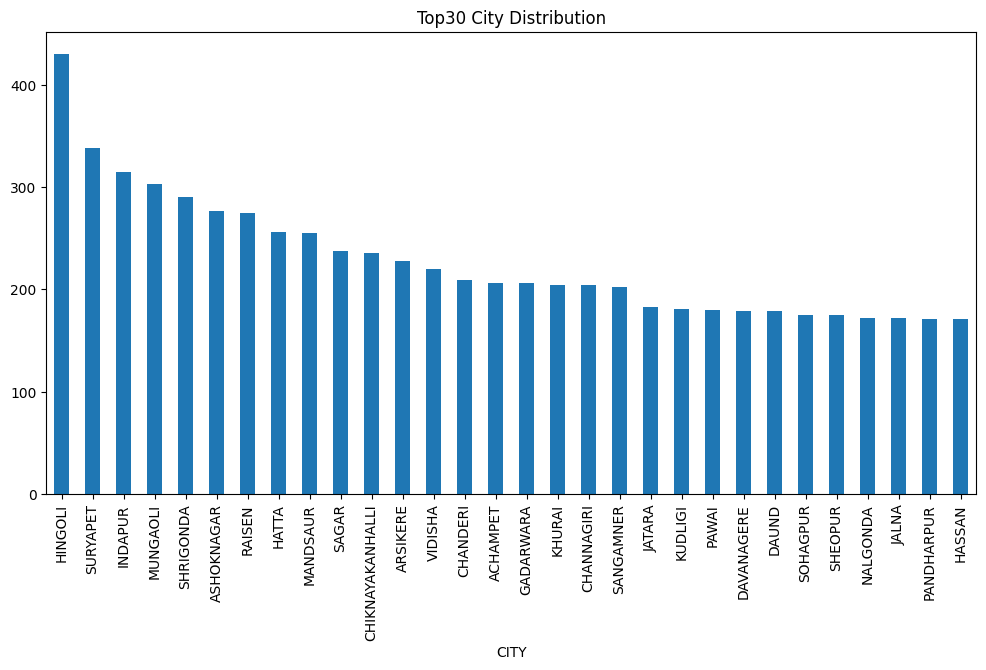

In [12]:
train_data['CITY'].value_counts()[:30].plot(kind='bar', figsize=(12, 6), title='Top30 City Distribution')

In [13]:
print('Hi')

Hi
